## Homework 5 Assignment 1
### Nina Nurrahmawati

Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

Grading:


- plot your original distribution
- plot at least one of the samples
- plot the distribution of z statistics
- fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).
- find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.
- plots need have caption, axis labels, etx and comment your figures and test results appropriately (to demonstrate your understanding).

In [1]:
# import all necessary libraries
from __future__ import print_function

import pandas as pd
import numpy as np
import pylab as pl
import seaborn  
%pylab inline
import scipy as sp
from scipy import stats
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# generate seeds
np.random.seed(777)

In [3]:
# decice population
Nsamples = 100
nit = 1000
mymean = 500.
mystddev = np.sqrt(mymean)
myDmeans = np.zeros(nit)

plot your original distribution

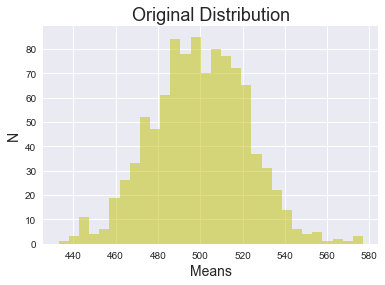

In [4]:
# histogram original distribution
pl.hist(np.random.poisson(mymean, size=nit), color='y', alpha=0.5, bins=30)
pl.title('Original Distribution', fontsize=18)
pl.xlabel('Means', fontsize = 14)
pl.ylabel('N', fontsize = 14)

#### Figure 1. Plot of original distributions

plot at least one of the samples

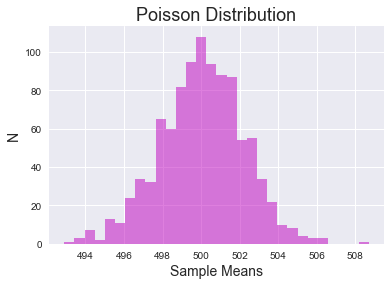

In [5]:
# histogram poisson distribution
for i in range(nit):
    mydistrib = sp.stats.poisson.rvs(mu=mymean, size=Nsamples)
    myDmeans[i] = mydistrib.mean()
mypoisson = myDmeans
pl.hist(mypoisson, color='m', alpha=0.5, bins=30)
pl.title('Poisson Distribution', fontsize=18)
pl.xlabel('Sample Means', fontsize = 14)
pl.ylabel('N', fontsize = 14)

#### Figure 2. Plot of poisson distributions

plot the distribution of z statistics

In [6]:
# z statistics
zs = (mymean - myDmeans) * np.sqrt(Nsamples) / mystddev

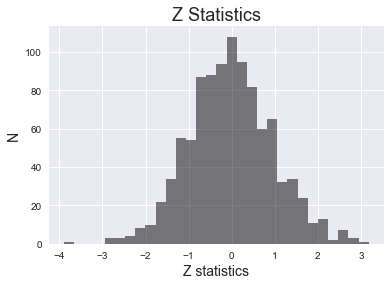

In [7]:
# plot
pl.hist(zs, color='k', alpha=0.5, bins=30)
pl.title('Z Statistics', fontsize=18)
pl.xlabel('Z statistics', fontsize = 14)
pl.ylabel('N', fontsize = 14)

#### Figure 3. Plot of Z statistics distributions

fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

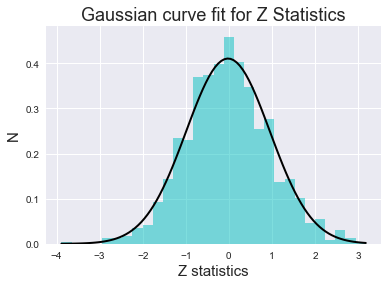

In [8]:
mu, std = norm.fit(zs)
xmin, xmax = pl.xlim()
x = np.linspace(min(zs), max(zs), 100)
p = norm.pdf(x, mu, std)

pl.hist(zs, color='c', bins=30, alpha=0.5, normed=True)
pl.plot(x, p, 'k', linewidth=2)
pl.xlabel('Z statistics', fontsize = 15)
pl.ylabel('N', fontsize = 15)
pl.title('Gaussian curve fit for Z Statistics', fontsize = 18)
    
plt.show()

#### Figure 4. Plot of Z statistics distributions fitted with Gaussian curve

$H_0$ : Distribution of Z statistics = Normal Distribution

$\alpha$ : 0.05

$$Critical$$$$value$$
![](https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/Lab4_fb55/ks2sample_table.png)

In [9]:
# KS test
KStest = sp.stats.kstest(zs, 'norm')
print ("KS Statistics : {} \nP Value : {}".format(KStest[0],KStest[1]))

KS Statistics : 0.0312898630615247 
P Value : 0.2764242216488886


In [10]:
if KStest[1] < 0.05:
    print("Null hypothesis is rejected. \nDistribution of Z statistic is not equal to Normal Distribution.")
else:
    print("Null hypothesis is NOT rejected. \nDistribution of Z statistic is equal to Normal Distribution.")

Null hypothesis is NOT rejected. 
Distribution of Z statistic is equal to Normal Distribution.
